In [1]:
import cv2

In [50]:
import os
import pandas as pd
import gzip
import numpy as np
import pickle
import tqdm

In [ ]:
import matplotlib.pylab as plt

In [70]:
%matplotlib inline

In [7]:
files = os.listdir('.')

In [13]:
!pwd

/home/jakub/data/rgb


In [11]:
cv2.imread(files[0]).shape

(512, 512, 3)

In [86]:
counter = 0
obs_array = []
n = 0

def create_episodes(file):
    im = cv2.imread(file)
    try:
        im.shape==(512,512,3)
        global counter
        global obs_array
        global n

        counter += 1 

        image = cv2.resize(im[204:,:],(80,48))
        obs_array.append(image)

        if counter==300:
            # write data out
            obs_array = np.array(obs_array)

            actions = 300 * [1]
            data = {
                'actions' : actions,
                'observations': obs_array }
            path = f'../transformed_carla/{n}.pickle.gz'
            n += 1

            fp= gzip.open(path,'w')
            pickle.dump(data,fp)
            fp.close()

            print(f"Wrote {obs_array.shape} to {path}")
            counter = 0
            obs_array = []
    except AttributeError:
        print(file)


In [77]:
for f in files[:301]:
    create_episodes(f)

Wrote (300, 48, 80, 3) to ../transformed_carla/0.pickle.gz


In [78]:
d = pickle.load(gzip.open('../transformed_carla/0.pickle.gz'))
d.keys()

dict_keys(['actions', 'observations'])

In [79]:
d['actions'][:5], len(d['actions'])

([1, 1, 1, 1, 1], 300)

In [80]:
d['observations'].shape

(300, 48, 80, 3)

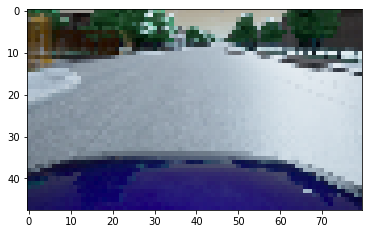

In [81]:
plt.imshow(d['observations'][0])

In [87]:
for f in files:
    create_episodes(f)

Wrote (300, 48, 80, 3) to ../transformed_carla/0.pickle.gz
Wrote (300, 48, 80, 3) to ../transformed_carla/1.pickle.gz
Wrote (300, 48, 80, 3) to ../transformed_carla/2.pickle.gz
Wrote (300, 48, 80, 3) to ../transformed_carla/3.pickle.gz
mass_transform.ipynb
Wrote (300, 48, 80, 3) to ../transformed_carla/4.pickle.gz
Wrote (300, 48, 80, 3) to ../transformed_carla/5.pickle.gz
Wrote (300, 48, 80, 3) to ../transformed_carla/6.pickle.gz
.ipynb_checkpoints
